In [ ]:
# 가상환경 만들기 conda create -n data_env_tensorflow2 python=3.7 openssl
# 필요한 모듈 설치
# 텐서플로우 버전 확인해보기
import tensorflow as tf

print(tf.__version__)  # 현재 설치된 TF 버전을 출력!
import tensorflow as tf
import numpy as np

# 랜덤값을 하나 읽어와요!
# numpy
random1 = np.random.rand(2,2)
print(random1)

# tensorflow
random2 = tf.random.normal([1], dtype=tf.float32)
print(random2)   # tesor가 출력되요!
# tf 1.x 버전에서는 node가 가지는 값을 얻어오려면 (node를 실행시키려면)
# Session이 있어야 했어요!
# tf 2.x 버전에서는 session없이 즉시 실행시킬 수 있어요!!(Eager Excution)
print(random2.numpy())
import tensorflow as tf

a = tf.constant(10, dtype=tf.float32)
b = tf.constant(20, dtype=tf.float32)

c = a + b

print('c의 값은 : {}'.format(c.numpy()))

d = 30.0

tensor_d = tf.convert_to_tensor(d)

print((c + tensor_d).numpy())
import tensorflow as tf
W = tf.Variable(tf.random.normal([1]),name ='weight')

# 기존에는 tf.Variable()을 이용해서 변수를 만들면 사용하기 전에
# 반드시 초기화를 진행해야 했어요!
# sess.run(tf.global_variables_initializer()) 
# TF 2.0에서는 초기화를 안해도 되요!!
print(W.numpy())
# tensorflow graph에 입력을 주는 부분이 없어졌어요!
# 기존에는 graph에게 데이터를 밀어넣기 위해서 placeholder를 이용했어요!
# Eager Excution에 의해서 이제는 placeholder가 필요 없게 됐어요!
# placsholder는 삭제되었습니다~

# Lazy excution을 하지않아요! 이젠 Eager Excution을 수행해요!
# tensorflow의 keras를 이용하여 Model을 생성해 보아요!
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# model = Sequential()  # keras model 생성

model = tf.keras.models.Sequential()   # keras model 생성

# model을 만들었으니 그 다음에는 layer를 만들어야 해요!
model.add(tf.keras.layers.Flatten(input_shape=(2,))) 
# input layer를 추가
# 독립변수 2개 짜리 input layer
model.add(tf.keras.layers.Dense(3, activation='softmax'))
# output layer 추가
# Dense(3) : 결과값의 개수
# softmax를 이용해 결과값을 확률값으로 바꿔서
# t를 onehot인코딩한 값과 비교!

# modelcompile 과정
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

# sklearn은 이미 만들어진 기성복같은!! 파라미터만 정하는것!
# keras는 내가 원하는 방식으로 로직 자체를 바꿀수 있디!(모듈화!!)
def my_loss:
    pass

# model 학습
model.fit(x_data_train,
          t_data_train,
          epochs=100,
          batch_size=100,
          validation_split=0.3)
# tensorflow 2.1을 이용해서 ozone 예제를 다시 구현해보아요!
# Multiple Linear Regression

import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential  # Model
from tensorflow.keras.layers import Flatten, Dense  # Layer
from tensorflow.keras.optimizers import SGD   # Optimizer
from sklearn.preprocessing import MinMaxScaler   # Normalization
from scipy import stats   # 이상치처리

# Data Loading
df = pd.read_csv('./data/ozone.csv')


# 결측치 확인 및 처리
# 일단 데이터가 충분히 많고 결측치가 적으면 삭제가 답이에요!
# 하지만 일반적으로 결측치를 삭제하면 데이터가 너무 많이 유실되기 때문에
# 다른 방식을 이용하게 되요!
print(df.shape)
print(df.isnull().sum())  # 각 컬럼별 결측치 개수
# KNN의 사용법에 대해서 알아보아요!
# sklearn을 이용해서 알아보아요!

# BMI예제를 이용해서 학습한 후 정확도를 특정해 보아요!
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Raw Data Loading
df = pd.read_csv('./data/bmi.csv')

# data split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df[['height', 'weight']],
                 df['label'],
                 test_size=0.3,
                random_state=0)

# Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

# Logistic Regression
model = LogisticRegression()
model.fit(x_data_train_norm, t_data_train)
print(model.score(x_data_test_norm, t_data_test)) # 생성된 모델 성능 확인

# KNN을 이용한 분류
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_data_train_norm, t_data_train)
print(knn_model.score(x_data_test_norm, t_data_test))   # 생성된 모델 성능 확인

In [40]:
import numpy as np
import pandas as pd
from scipy import stats # 이상치 처리를 위해서 필요
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
import warnings

# KNeighborsRegressor  : Regression 처리 할떄 사용 , 값을 찾을 때 사용
# KNeighborsClassifier : 분류할 떄 사용 , 0 과 1 등등
warnings.filterwarnings(action='ignore') # warning 출력을 하지 않아요

# Raw Data Loading

df = pd.read_csv('/Users/mac/notebook_dir/data/ozone.csv')

training_data = df

x_data = training_data[['Solar.R','Wind','Temp']]
t_data = training_data['Ozone']

# split을 하지 않는 이유는 linear regression을 하는거기 때문에 
# 정확도 측정이 의미가 없기에 하지 않는다.

# 결측치 확인
# 1. 독립변수에 대한 결측치 처리부터 할게요 !
# df.isnull().sum()
# Ozone 이 종속변수, 나머지가 독립변수
#   Solar.R 에 7개의 결측치가 있는데 median으로 처리할게요 !
# nanmedian : nan을 제외하고 나머지 데이터의 데해 median을 구해라
for col in x_data.columns:
    col_median = np.nanmedian(x_data[col])
    x_data[col].loc[x_data[col].isnull()] = col_median
    
# x_data.isnull().sum()

# 2. 독립변수에 대한 이상치를 검출한 후 이 이상치는 mean 처리할게요 
zscore = 1.8

for col in x_data.columns:
    outliers = x_data[col][np.abs(stats.zscore(x_data[col])) > zscore]
#     print(outliers)
    col_mean = np.mean(x_data.loc[~x_data[col].isin(outliers),col])
    x_data.loc[x_data[col].isin(outliers),col] = col_mean
#     print(col_mean)


# 3. 정규화 진행해요 !

scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

# MinMax scaling하려면 2차원이 들어가야 하기 때문에 reshape 해줘야함
scaler_x.fit(x_data.values)
scaler_t.fit(t_data.values.reshape(-1,1))

x_data_norm = scaler_x.transform(x_data)  # 2차원
t_data_norm = scaler_t.transform(t_data.values.reshape(-1,1)).ravel()
# 2차원으로 변경
# 나중에 1차원으로 사용되야야 해서 그래서 ravel() 사용.
    

# 4. 종속변수(Ozone)에 대한  결측치는 KNN을 이용해서 예측값으로 imputation할 거에요 !
#    학습에 사용될 x_data_train_norm , t_data_train_norm을 구해야 해요 !

x_data_train_norm = x_data_norm[~np.isnan(t_data_norm)]
t_data_train_norm = t_data_norm[~np.isnan(t_data_norm)]

# KNN 모델 생성후 학습진행
knn_regressor = KNeighborsRegressor(n_neighbors=2)
knn_regressor.fit(x_data_train_norm,t_data_train_norm)

# knn_predict 
knn_predict = knn_regressor.predict(x_data_norm[np.isnan(t_data_norm)])
t_data_norm[np.isnan(t_data_norm)] = knn_predict

# 최종 데이터를 생성했어요 !
# x_data_norm
# t_data_norm

###############################################
# 학습을 진행해 보아요 ! Linear Regression

from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

test_data = [[310, 15, 80]] # 테스트 데이터 !! Ozone량을 예측해 보아요 !

# sklearn
sklearn_model = LinearRegression()
sklearn_model.fit(x_data_norm,t_data_norm)
result = sklearn_model.predict(scaler_x.transform(test_data)).reshape(-1,1)

scaled_result = scaler_t.inverse_transform(result)
print('sklearn의 결과 : {}'.format(scaled_result))

# Tensorflow 2.x 
# 모델생성
keras_model = Sequential()
# 레이어 추가
keras_model.add(Flatten(input_shape=(3,))) # 안에 독립변수의 개수를 shape로 잡아줘야함
# input Layer
keras_model.add(Dense(1, activation='linear'))
# 아웃풋의 개수가 들어감 , Ozone값 하나가 아웃풋임
# W는 레이어 중간에 위치함, 하지만 우리는 코드상에 W를 표시하지는 않음
# bias는 dense layer안에 숨어있다. ( 노드 안에 있음 )

# compile
keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                   loss = 'mse') # mse : 최소제곱법
# 학습
keras_model.fit(x_data_norm, t_data_norm,
               epochs=5000,
               verbose=0) # verbose : accuracy 있을떄 쓰면됨
# predict
result = keras_model.predict(scaler_x.transform(test_data)).reshape(-1,1)

scaled_result = scaler_t.inverse_transform(result)
print('tensorflow의 결과 : {}'.format(scaled_result))

sklearn의 결과 : [[38.75927452]]
tensorflow의 결과 : [[38.626904]]


In [42]:
## Logistic Regression에 대해서 sklearn과 Tensorflow 2.x 구현을
## 해볼거에요 !!
## titanic(kaggle) => logistic 문제 (결측치가 다수 있어요 !)
## feature engineering

## 데이터를 완전히 준비하는 건 여러분들이 해보세요 !
## 데이터 준비가 끝나면 같이 구현하는 부분만 해 보아요 !

In [46]:

import numpy as np
import pandas as pd
from scipy import stats # 이상치 처리를 위해서 필요
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
import warnings
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD


train = pd.read_csv('/Users/mac/notebook_dir/data/titanic/train.csv')
test = pd.read_csv('/Users/mac/notebook_dir/data/titanic/test.csv')

train.drop(['PassengerId','Ticket','Cabin','Name','Fare'],axis = 1, inplace = True)

# 성별처리

sex_mapping = { 'male' : 0, 'female' : 1}
train['Sex'] = train['Sex'].map(sex_mapping)

# 가족처리
train['Family'] = train['SibSp'] + train['Parch']
train.drop(['SibSp','Parch'], axis = 1, inplace = True)

# Embarked 결측치 처리

train['Embarked'] = train['Embarked'].fillna('Q')

# Age에 대한 결측치 처리

train['Age'] = train['Age'].fillna(train['Age'].mean())

# Embarked 문자 => 숫자 처리

embarked_mapping = {'S' : 0 , 'C' : 1, 'Q' : 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)

# Age에 대해서 Binning 처리(Numerical value -> categorical value)
train.loc[train['Age'] < 8, 'Age'] = 0 # 아이는 0
train.loc[(train['Age'] >= 8) & (train['Age'] < 20), 'Age'] = 1
train.loc[(train['Age'] >= 20) & (train['Age'] < 65), 'Age'] = 2
train.loc[train['Age'] >= 65, 'Age'] = 3

display(train)

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,2.0,0,1
1,1,1,1,2.0,1,1
2,1,3,1,2.0,0,0
3,1,1,1,2.0,0,1
4,0,3,0,2.0,0,0
...,...,...,...,...,...,...
886,0,2,0,2.0,0,0
887,1,1,1,1.0,0,0
888,0,3,1,2.0,0,3
889,1,1,0,2.0,1,0


In [10]:
%reset

# TF 2.0버전
# Gate 연산으로 수행하는 Deep Learning으로 구현해보아요
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


# Training Data set
x_data = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]], dtype = np.float32)
t_data = np.array([[0],[1],[1],[0]], dtype = np.float32)

model = Sequential()
# model.add(Flatten(input_shape=(2,)))   # flatten은 생략하고 Dense에 추가가능
model.add(Dense(100, activation='sigmoid', input_shape=(2,)))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=1e-1),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_data,
                   t_data,
                   epochs=30000,
                   verbose=0)
predict_val = model.predict(x_data)

result = tf.cast(predict_val >= 0.5, dtype=tf.float32).numpy().ravel()


        
# # 성능평가 ( Accuracy )
# accuracy= tf.cast(H >= 0.5, dtype = tf.float32)
# result = sess.run(accuracy, feed_dict={X:x_data})
print(classification_report(t_data.ravel(), result))

Once deleted, variables cannot be recovered. Proceed (y/[n])? ㅛ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



<class 'dict_keys'>


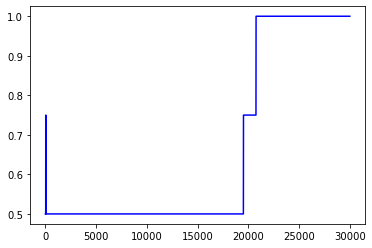

In [12]:
print(type(history.history.keys()))

# dict_keys(['loss','accuracy'])의 accuracy는
# epoch당 train data를 이용한 acuuracy를 의미

plt.plot(history.history['accuracy'], color = 'b')
plt.show()

In [ ]:
%reset

# TF 2.0버전
# Gate 연산으로 수행하는 Deep Learning으로 구현해보아요
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

df = pd.read_csv('~/notebook_dir/data/digit-recognizer/numtrain.csv')

x_data = df.drop('label', axis=1)
t_data = df['label']

t_data
# # Training Data set
# x_data = np.array([[0,0],
#                   [0,1],
#                   [1,0],
#                   [1,1]], dtype = np.float32)
# t_data = np.array([[0],[1],[1],[0]], dtype = np.float32)

# model = Sequential()
# # model.add(Flatten(input_shape=(2,)))   # flatten은 생략하고 Dense에 추가가능
# model.add(Dense(100, activation='sigmoid', input_shape=(2,)))
# model.add(Dense(6, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer=SGD(learning_rate=1e-1),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# history = model.fit(x_data,
#                    t_data,
#                    epochs=30000,
#                    verbose=0)
# predict_val = model.predict(x_data)

# result = tf.cast(predict_val >= 0.5, dtype=tf.float32).numpy().ravel()


        
# # # 성능평가 ( Accuracy )
# # accuracy= tf.cast(H >= 0.5, dtype = tf.float32)
# # result = sess.run(accuracy, feed_dict={X:x_data})
# print(classification_report(t_data.ravel(), result))

In [ ]:
%reset

# TF 2.0버전
# Gate 연산으로 수행하는 Deep Learning으로 구현해보아요
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

df = pd.read_csv('~/notebook_dir/data/digit-recognizer/numtrain.csv')

x_data = df.drop('label', axis=1)
t_data = df['label']

t_data
# # Training Data set
# x_data = np.array([[0,0],
#                   [0,1],
#                   [1,0],
#                   [1,1]], dtype = np.float32)
# t_data = np.array([[0],[1],[1],[0]], dtype = np.float32)

# model = Sequential()
# # model.add(Flatten(input_shape=(2,)))   # flatten은 생략하고 Dense에 추가가능
# model.add(Dense(100, activation='sigmoid', input_shape=(2,)))
# model.add(Dense(6, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer=SGD(learning_rate=1e-1),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# history = model.fit(x_data,
#                    t_data,
#                    epochs=30000,
#                    verbose=0)
# predict_val = model.predict(x_data)

# result = tf.cast(predict_val >= 0.5, dtype=tf.float32).numpy().ravel()


        
# # # 성능평가 ( Accuracy )
# # accuracy= tf.cast(H >= 0.5, dtype = tf.float32)
# # result = sess.run(accuracy, feed_dict={X:x_data})
# print(classification_report(t_data.ravel(), result))